<h2 align =center > EDA </h2>

#### The libraries to be used are imported.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Tools as t

#### Data is ingested into a Pandas dataframe.

                                                                                --> Censo del 2020  
https://www.indec.gob.ar/indec/web/Nivel4-CensoProvincia-999-999-02-999-2010    --> Censo del 2010  
https://www.indec.gob.ar/indec/web/Nivel4-CensoProvincia2001-0-999-02-0-2001    --> Censo del 2001

In [12]:
df = pd.read_csv("data/df_accidentes.csv")
df.head()

,idSiniestro,NumVictimas,Fecha,Anio,Mes,Dia,Hora,H,LugarHecho,TipoDeCalle,...,PosX,PosY,Participantes,Victima,Acusado,barrio,Rol,Sexo,Edad,FechaFallecimiento
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,VILLA RIACHUELO,CONDUCTOR,1.0,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,No se encontró el barrio para estas coordenadas.,CONDUCTOR,1.0,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONSTITUCION,CONDUCTOR,1.0,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-58.465039,-34.680930,MOTO-SD,MOTO,SD,VILLA LUGANO,CONDUCTOR,1.0,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONSTITUCION,CONDUCTOR,1.0,29,2016-02-01 00:00:00


In [13]:
df.columns

Index(['idSiniestro', 'NumVictimas', 'Fecha', 'Anio', 'Mes', 'Dia', 'Hora',
       'H', 'LugarHecho', 'TipoDeCalle', 'Calle', 'Cruce',
       'DireccionNormalizada', 'Comuna', 'PosX', 'PosY', 'Participantes',
       'Victima', 'Acusado', 'barrio', 'Rol', 'Sexo', 'Edad',
       'FechaFallecimiento'],
      dtype='object')

#### Missing values

In [14]:
nulos = t.PorcentajeNulos(df)
nulos

,%_valores_nulos,Cantidad_Nulos,Cantidad_NO_Nulos,Total_Registros
idSiniestro,0.00,0,717,717
NumVictimas,0.00,0,717,717
Fecha,0.00,0,717,717
Anio,0.00,0,717,717
Mes,0.00,0,717,717
Dia,0.00,0,717,717
Hora,0.00,0,717,717
H,0.00,0,717,717
LugarHecho,0.00,0,717,717
TipoDeCalle,0.00,0,717,717


In [15]:
sindato = t.ContarRegistrosSD(df, 'SD')
sindato

TypeError: ContarRegistrosSD() missing 1 required positional argument: 'palabra2'

#### Outliers

<Axes: xlabel='Anio'>

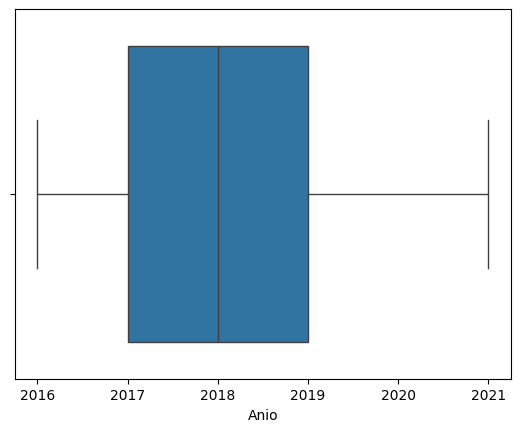

In [17]:
sns.boxplot(data = df, x = 'Anio')

Text(0.5, 1.0, 'Cantidad de accidentes por Comuna')

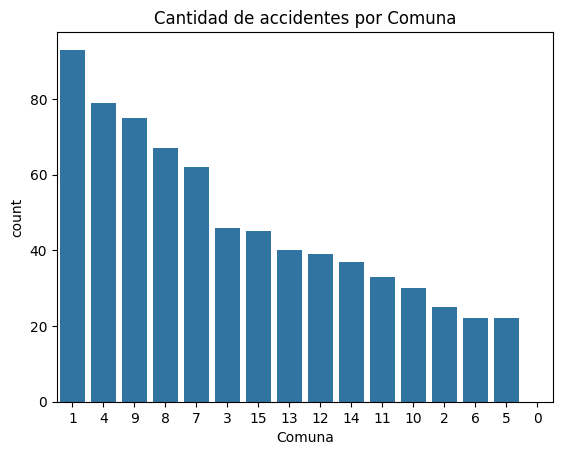

In [15]:
order = df['Comuna'].value_counts().index
mascara = df['Comuna'] != 0
sns.countplot(data = df[mascara], x = 'Comuna', order = order)
plt.title('Cantidad de accidentes por Comuna del año ')

Text(0.5, 1.0, 'Tipo de Calles donde ocurren accidentes')

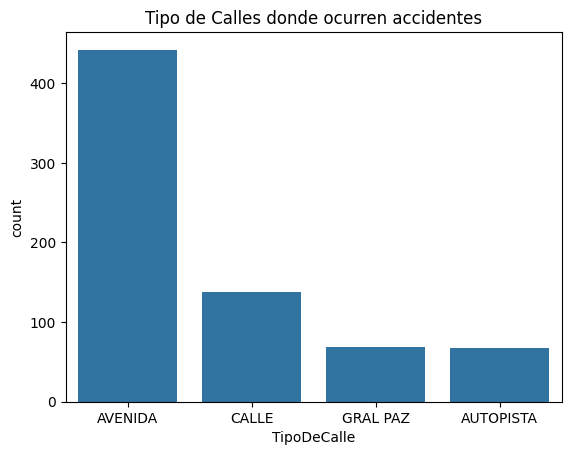

In [7]:
order = df['TipoDeCalle'].value_counts().index
sns.countplot(data = df, x = 'TipoDeCalle',order=order)
plt.title('Tipo de Calles donde ocurren accidentes')

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.  

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000  

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.  

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100